# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

**Задание №1.**\
A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb) \
B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

**Задание №2.** Применить ансамбли для наборов данных своего варианта:
- BaggingClassifier
- BaggingRegressor

- GradientBoostingClassifier
- GradientBoostingRegressor

- StackingClassifier
- StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

**Задание №3.** Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
- Catboost,
- XGBoost,
- LightGBM

Выполнить оценку качества моделей и выбрать лучшую модель.

**Доп. задание:** реализовать любой из понравившихс мета алгоритмов (бэггинг, бустинг, стэкинг)

In [3]:
import pandas as pd
import numpy as np

# Задание 1. DT, Pycaret, CART.

## Decision Tree Classifier

In [4]:
df_clf=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset4_with_EDA")
df_clf

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60596,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
60597,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
60598,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
60599,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [5]:
from sklearn.model_selection import train_test_split

y_clf = df_clf['Fire Alarm']
X_clf = df_clf.drop(['Fire Alarm'], axis=1)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=0)

X_train_clf.shape, y_train_clf.shape, X_test_clf.shape, y_test_clf.shape

((48480, 12), (48480,), (12121, 12), (12121,))

In [6]:
X_train_clf.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw H2', 'Raw Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'],
      dtype='object')

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_param = [{'criterion': ['entropy', 'gini'], 
                'max_depth': [i for i in range(1, 20)]}]

dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)

In [8]:
%%time
dtc_model.fit(X_train_clf, y_train_clf)

CPU times: total: 31.3 s
Wall time: 36.9 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}])

In [9]:
dtc_model.best_params_

{'criterion': 'entropy', 'max_depth': 18}

In [10]:
dtc_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

$Entropy = \sum_{i=1}^{C}-p_i\cdot \log_{2}p_i$, где $p(с_i)$ - вероятность, относящаяся к $c_i$ классу

In [11]:
y_pred_clf = dtc_model.best_estimator_.predict(X_test_clf)

print(f'Точность на тренировочных данных: {dtc_model.best_score_}')
print(f'Точность на тестовых данных: {accuracy_score(y_test_clf, y_pred_clf)}')

Точность на тренировочных данных: 0.9998762376237623
Точность на тестовых данных: 0.9997524956686742


### Визуализации

In [12]:
from sklearn import tree

text_representation = tree.export_text(dtc_model.best_estimator_, feature_names=list(X_clf.columns))
print(text_representation)

|--- Pressure <= 938.14
|   |--- Pressure <= 933.95
|   |   |--- Temperature <= 23.43
|   |   |   |--- PM1.0 <= 4026.91
|   |   |   |   |--- Raw Ethanol <= 20328.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Raw Ethanol >  20328.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- PM1.0 >  4026.91
|   |   |   |   |--- class: 1
|   |   |--- Temperature >  23.43
|   |   |   |--- class: 1
|   |--- Pressure >  933.95
|   |   |--- Pressure <= 937.60
|   |   |   |--- class: 0
|   |   |--- Pressure >  937.60
|   |   |   |--- eCO2 <= 447.00
|   |   |   |   |--- class: 0
|   |   |   |--- eCO2 >  447.00
|   |   |   |   |--- TVOC <= 31.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TVOC >  31.50
|   |   |   |   |   |--- class: 0
|--- Pressure >  938.14
|   |--- TVOC <= 200.50
|   |   |--- NC0.5 <= 8.97
|   |   |   |--- TVOC <= 124.50
|   |   |   |   |--- TVOC <= 120.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TVOC >  120.50
|   |   |   |   |   |--- PM2.5 <= 1

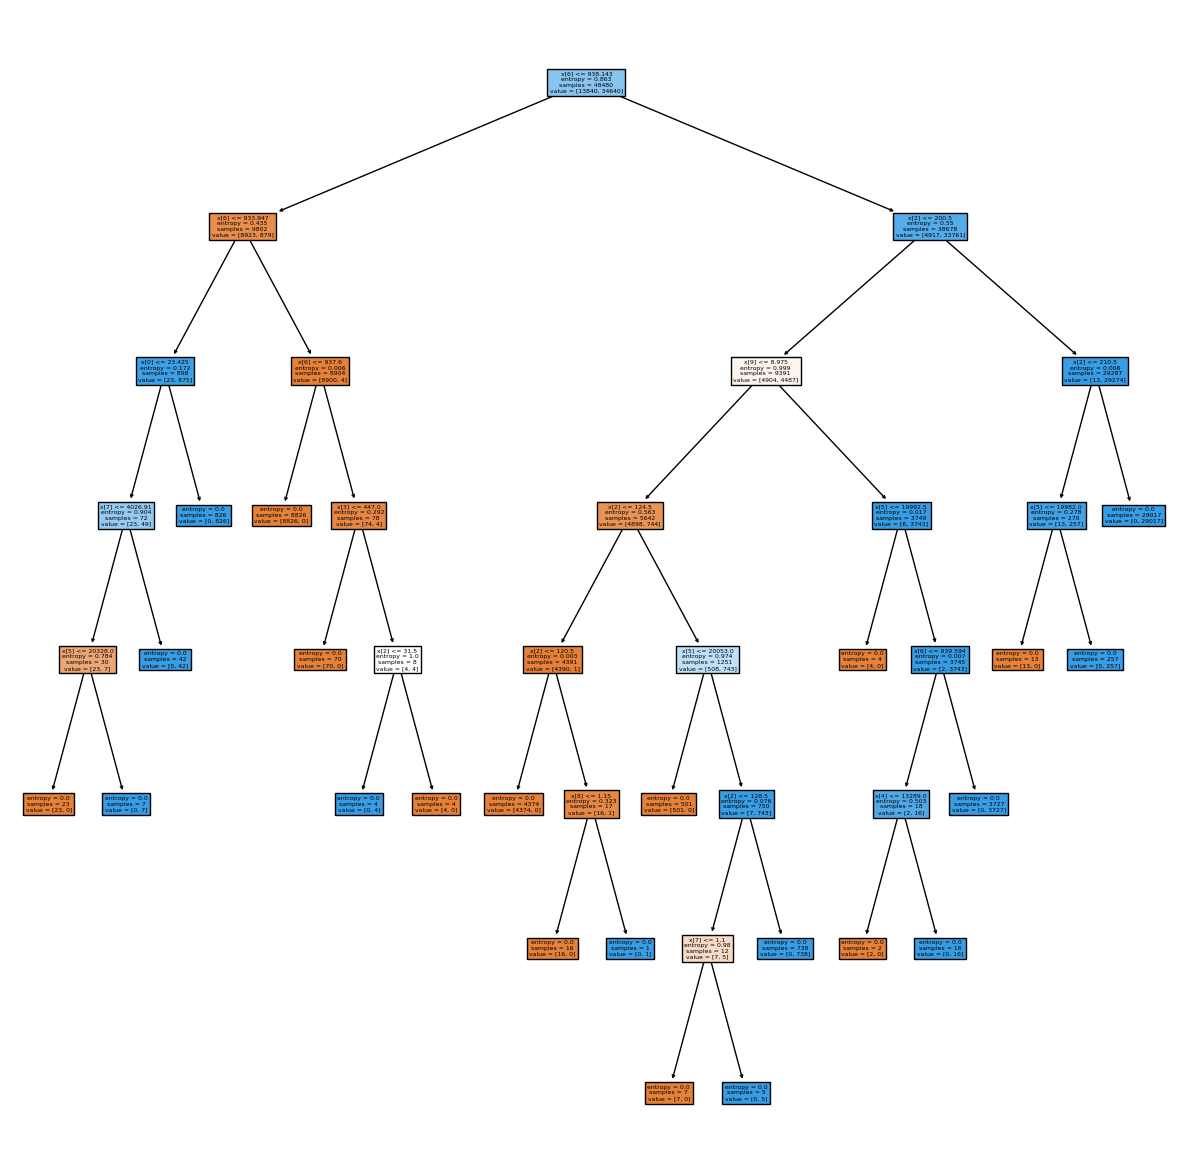

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTS.png')

In [14]:
""" import graphviz

dot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,
                              feature_names=[i for i in X_train_clf.columns],
                              class_names=[str(i) for i in y_train_clf],
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph """

' import graphviz\n\ndot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,\n                              feature_names=[i for i in X_train_clf.columns],\n                              class_names=[str(i) for i in y_train_clf],\n                              filled=True, rounded=True,\n                              special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph '

In [15]:
""" import dtreeviz

image_est = dtreeviz.model(dtc_model.best_estimator_,
               X_train=X_train_clf,
               y_train=y_train_clf,
               target_name='class',
               feature_names=[i for i in X_train_clf.columns],
               class_names=['No Alarm', 'Yes Alarm'])
image_est.view()
image_est.save('dtreeviz.svg') """

" import dtreeviz\n\nimage_est = dtreeviz.model(dtc_model.best_estimator_,\n               X_train=X_train_clf,\n               y_train=y_train_clf,\n               target_name='class',\n               feature_names=[i for i in X_train_clf.columns],\n               class_names=['No Alarm', 'Yes Alarm'])\nimage_est.view()\nimage_est.save('dtreeviz.svg') "

### Оценка построенной модели (подробнее)

Проверка переобучения и недообучения

In [16]:
print('Training set score: {:.4f}'.format(dtc_model.score(X_train_clf, y_train_clf)))
print('Test set score: {:.4f}'.format(dtc_model.score(X_test_clf, y_test_clf)))

Training set score: 1.0000
Test set score: 0.9998


Confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3465    3]
 [   0 8653]]


Classification report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      8653

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



## Decision Tree Regressor 

In [19]:
df_reg=pd.read_csv("C:/Users/seito/Jupyter Notebook/data/dataset3_with_EDA")
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


Уберем выбросы 😊

In [20]:
outlier = df_reg[['Price', 'Area']]

Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

# Копирование индексов
index_list = list(data_filtered.index.values)
# Хранить данные без выбросов в отдельном DataFrame.
df_reg = df_reg[df_reg.index.isin(index_list)]
df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
0,2240.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,0
1,3500.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,0
2,3170.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,0
3,1870.0,629.0,19.155756,72.846862,2,2,2,1,1,0,1,0
4,1350.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1950.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,0
6251,2200.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,0
6252,2000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,0
6253,1100.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,0


In [21]:
y_reg = df_reg['Price']
X_reg = df_reg.drop(["Price"], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=0)

X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((4432, 11), (4432,), (1109, 11), (1109,))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_param = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(2, 20)]}]

dtr_model = GridSearchCV(DecisionTreeRegressor(),
                        tree_param,
                        cv=5,
                        n_jobs=-1,
                        verbose=True)


In [23]:
%%time
dtr_model.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 1026 candidates, totalling 5130 fits
CPU times: total: 3.53 s
Wall time: 1min 34s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             verbose=True)

In [24]:
dtr_model.best_params_

{'criterion': 'absolute_error', 'max_depth': 11, 'min_samples_leaf': 17}

In [25]:
random = X_reg.sample(1, random_state=45)
print(random)

       Area   Latitude  Longitude  Bedrooms  Bathrooms  Balcony  Neworold  \
2168  718.0  19.167328  72.934784         2          2        0         0   

      Parking  Furnished_Status  Lift  Type_Of_Building  
2168        0                 0     0                 0  


In [26]:
print("Реальное значение: ", y_reg.iloc[random.index[0]])
print("Предсказанное значение: ", dtr_model.predict(random)[0])

Реальное значение:  2000.0
Предсказанное значение:  1500.0


In [27]:
dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_).fit(X_train_reg, y_train_reg)
y_pred_reg = dtr_model_best.predict(X_test_reg)

### Оценка качества

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2:", r2_score(y_test_reg, y_pred_reg))

MAE: 413.9788097385032
MSE: 372767.71618575294
R^2: 0.6785268347154043


C:\Users\seito\AppData\Local\Temp\ipykernel_20940\1284325592.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(y_test_reg, hist=False, color='Red', label='Actual price')
C:\Users\seito\AppData\Local\Temp\ipykernel_20940\1284325592.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

<AxesSubplot: xlabel='Price', ylabel='Density'>

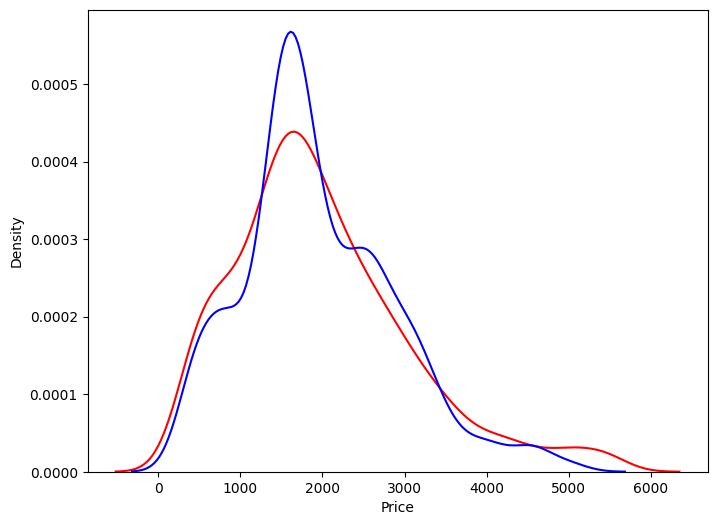

In [29]:
import seaborn as sns

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(y_test_reg, hist=False, color='Red', label='Actual price')
sns.distplot(y_pred_reg, hist=False, color='Blue', ax=ax1, label='Predicted price')

Не средние, а на разных выборках: 

In [30]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(dtr_model_best,
                            X_reg, y_reg,
                            cv=10,
                            scoring=["r2", ])
pd.DataFrame(data=cv_results)

,fit_time,score_time,test_r2
0,0.837810,0.003010,0.637906
1,0.803582,0.000992,0.714435
2,0.841184,0.001002,0.689507
3,0.830119,0.000975,0.655881
4,0.803393,0.002104,0.652838
5,0.825793,0.002023,0.668819
6,0.810106,0.000994,0.696957
7,0.797975,0.000997,0.739345
8,0.798896,0.001008,0.627320
9,0.807489,0.000895,0.603861


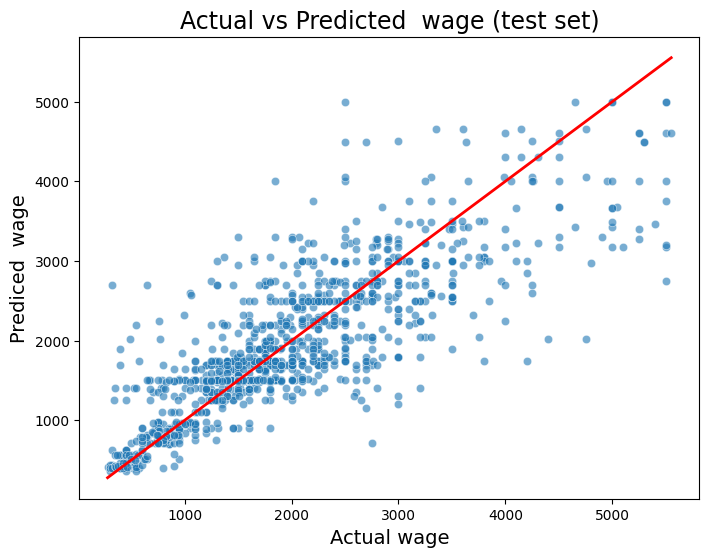

In [31]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
sns.lineplot(x=y_test_reg, y=y_test_reg, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

### Обрезка дерева с использованием метода обрезки по сложности затрат. Выбор $\alpha$ с помощью кросс-валидации.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_reg,y_train_reg)
ccp_alphas = path.ccp_alphas

In [33]:
len(ccp_alphas)

3312

In [34]:
unique_ccp_alphas = list(set(ccp_alphas))
len(unique_ccp_alphas)

2157

In [35]:
""" RMSE_CV=[]
for alpha in unique_ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(**dtr_model.best_params_, random_state=1,ccp_alpha=alpha), X = X_train_reg, y = y_train_reg, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    print(MSE)
                                                                                                                             

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head() """

' RMSE_CV=[]\nfor alpha in unique_ccp_alphas:\n    MSE = -cross_val_score(estimator = DecisionTreeRegressor(**dtr_model.best_params_, random_state=1,ccp_alpha=alpha), X = X_train_reg, y = y_train_reg, cv = 5 , scoring="neg_mean_squared_error" )\n    RMSE_CV.append(np.sqrt(MSE).mean())\n    print(MSE)\n                                                                                                                             \n\noutput = pd.DataFrame(list(ccp_alphas), columns=[\'alpha\'])\noutput[\'RMSE_CV\']=RMSE_CV\n\noutput.head() '

In [36]:
# sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
# plt.show()

In [37]:
# np.argmin(output['RMSE_CV'])

In [38]:
# optimal = output.iloc[np.argmin(output['RMSE_CV']),]
# optimal

In [39]:
# optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
# optimal_alpha

Refit DTs regressor с оптимальным значением alpha:

In [40]:
# dtr_model_best = DecisionTreeRegressor(**dtr_model.best_params_, ccp_alpha=optimal_alpha)
# dtr_model_best.fit(X_train_reg, y_train_reg)
# y_pred_reg = dtr_model_best.predict(X_test_reg)

### Визуализации

In [41]:
tree_rules = tree.export_text(dtr_model_best, feature_names=list(X_reg.columns))
print(tree_rules)

|--- Latitude <= 19.23
|   |--- Bathrooms <= 2.50
|   |   |--- Latitude <= 19.15
|   |   |   |--- Longitude <= 72.86
|   |   |   |   |--- Latitude <= 19.07
|   |   |   |   |   |--- Area <= 1153.50
|   |   |   |   |   |   |--- Area <= 756.50
|   |   |   |   |   |   |   |--- Latitude <= 19.04
|   |   |   |   |   |   |   |   |--- Area <= 673.50
|   |   |   |   |   |   |   |   |   |--- value: [2425.00]
|   |   |   |   |   |   |   |   |--- Area >  673.50
|   |   |   |   |   |   |   |   |   |--- value: [2050.00]
|   |   |   |   |   |   |   |--- Latitude >  19.04
|   |   |   |   |   |   |   |   |--- value: [2975.00]
|   |   |   |   |   |   |--- Area >  756.50
|   |   |   |   |   |   |   |--- Longitude <= 72.82
|   |   |   |   |   |   |   |   |--- value: [4300.00]
|   |   |   |   |   |   |   |--- Longitude >  72.82
|   |   |   |   |   |   |   |   |--- Latitude <= 18.96
|   |   |   |   |   |   |   |   |   |--- value: [2025.00]
|   |   |   |   |   |   |   |   |--- Latitude >  18.96
|   |   |   |

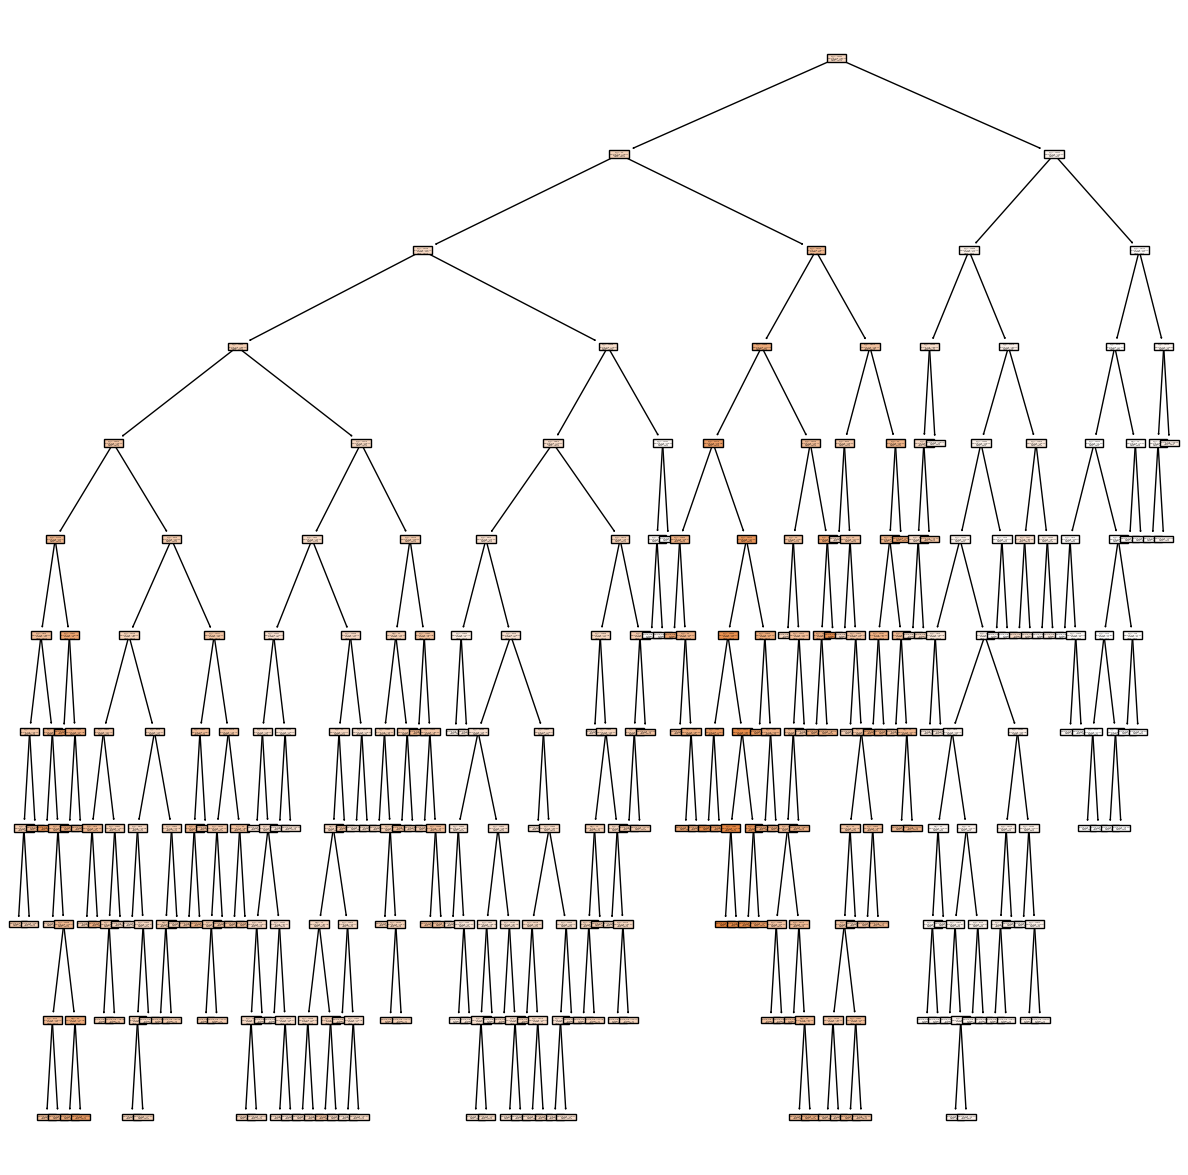

In [42]:
plt.figure(figsize=(15,15))
plot_tree(dtr_model_best, filled=True, impurity=True) 

plt.savefig('figures/plot_tree-DTR.png')

## PyCaret

### Классификация

In [43]:
from pycaret.classification import *

Инициализация данных и препроцессинг:

In [44]:
setup(data=df_clf,  target='Fire Alarm', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(60601, 13)"
4,Transformed data shape,"(60601, 13)"
5,Transformed train set shape,"(42420, 13)"
6,Transformed test set shape,"(18181, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


Создание модели: 

In [45]:
# функция возвращает таблицу с кросс-валидированными оценками и объект обученной модели
dt_clf = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9998,0.9997,1.0000,0.9998,0.9994,0.9994
1,0.9995,0.9994,0.9997,0.9997,0.9997,0.9988,0.9988
2,0.9995,0.9992,1.0000,0.9993,0.9997,0.9988,0.9988
3,0.9998,0.9996,1.0000,0.9997,0.9998,0.9994,0.9994
4,0.9998,0.9996,1.0000,0.9997,0.9998,0.9994,0.9994
5,0.9993,0.9990,0.9997,0.9993,0.9995,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9995,0.9994,0.9997,0.9997,0.9997,0.9988,0.9988
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Настройка модели:

In [46]:
# используется для автоматической настройки гиперпараметров модели машинного обучения
# по умолчанию это random grid search
tuned_dt_clf = tune_model(dt_clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9981,0.9987,0.9993,0.9980,0.9987,0.9954,0.9954
1,0.9995,0.9991,1.0000,0.9993,0.9997,0.9988,0.9988
2,0.9983,0.9999,1.0000,0.9977,0.9988,0.9959,0.9960
3,0.9993,1.0000,1.0000,0.9990,0.9995,0.9983,0.9983
4,0.9998,1.0000,1.0000,0.9997,0.9998,0.9994,0.9994
5,0.9991,1.0000,1.0000,0.9987,0.9993,0.9977,0.9977
6,0.9979,0.9997,0.9990,0.9980,0.9985,0.9948,0.9948
7,0.9991,0.9999,1.0000,0.9987,0.9993,0.9977,0.9977
8,0.9986,0.9986,0.9997,0.9984,0.9990,0.9965,0.9965


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Оригинальная модель была лучше, чем настроенная модель.

### Регрессия

In [47]:
from pycaret.regression import *

Инициализация данных и препроцессинг:

In [48]:
setup(data=df_reg,  target='Price', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5541, 12)"
4,Transformed data shape,"(5541, 12)"
5,Transformed train set shape,"(3878, 12)"
6,Transformed test set shape,"(1663, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Создание модели: 

In [49]:
# функция возвращает таблицу с кросс-валидированными оценками и объект обученной модели
dt_reg = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,506.2835,633969.4639,796.2220,0.5427,0.4178,0.3523
1,585.1727,753632.3222,868.1200,0.3911,0.4480,0.3384
2,523.7848,619774.2532,787.2574,0.5129,0.3992,0.3077
3,496.6443,597406.0206,772.9204,0.4938,0.3761,0.2884
4,553.2229,652483.9800,807.7648,0.3949,0.3983,0.3092
5,573.3290,683091.5931,826.4936,0.4318,0.3745,0.2981
6,575.6263,660918.3067,812.9688,0.4338,0.4240,0.3694
7,497.6323,515852.6489,718.2288,0.5740,0.3669,0.2817
8,525.3850,594398.5271,770.9725,0.5227,0.3978,0.3058


Настройка модели:

In [50]:
# используется для автоматической настройки гиперпараметров модели машинного обучения
# по умолчанию это random grid search
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,460.2784,485192.1740,696.5574,0.6500,0.3846,0.3372
1,468.7397,514691.0580,717.4197,0.5842,0.3572,0.2883
2,436.9923,401687.7603,633.7884,0.6843,0.3287,0.2686
3,437.3376,445155.2242,667.1995,0.6228,0.3328,0.2648
4,418.7204,346331.8151,588.4996,0.6788,0.3017,0.2354
5,446.6057,423084.9407,650.4498,0.6481,0.2944,0.2337
6,484.6057,536030.1778,732.1408,0.5408,0.3720,0.3141
7,458.8686,432584.8892,657.7119,0.6427,0.3401,0.2890
8,481.1111,518112.2829,719.8002,0.5840,0.3521,0.2907


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## CART

In [89]:
%run -m CART

- Entropy (Энтропия)\
$E = \sum{}{}-p_i\cdot \log{2}{p_i}$, где $p_i =$ *probability of class i*

- Gini Index (Индекс Джини)\
$G = 1 - \sum{}{}(p_i)^2$

- MSE (квадратичная ошибка)\
$squared error = \sum{}{}(y - \widetilde{y})^2$

- MAE (абсолютная ошибка)\
$absolute error = \sum{}{}|y - \widetilde{y}|$

- Information Gain (Прирост информации)\
$IG = E(parent) - \sum{}{}w_i\cdot E(child_i)$

### Проверка классификации

In [90]:
cropped_df_clf = df_clf.sample(n=1000)
cropped_df_clf

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
36399,25.510,47.55,1193,592,12816,19441,938.981,2.30,2.39,15.81,2.465,0.056,1
24724,11.780,56.24,1,400,12818,19807,939.835,0.11,0.12,0.77,0.120,0.003,0
16155,13.277,53.66,1163,404,12896,19442,938.770,2.08,2.16,14.28,2.227,0.050,1
10442,3.870,48.61,990,659,12795,19490,939.067,2.08,2.16,14.31,2.232,0.050,1
2758,13.380,45.54,120,400,13171,20054,939.666,0.97,1.01,6.66,1.039,0.023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47998,25.820,47.69,1325,419,12984,19398,938.809,2.22,2.31,15.28,2.382,0.054,1
23254,-13.671,47.80,1247,400,12996,19412,938.764,1.63,1.70,11.25,1.754,0.040,1
19980,8.793,52.41,915,400,13026,19496,938.720,2.98,3.10,20.53,3.201,0.072,1
54757,53.720,12.78,3076,400,13507,19900,936.675,0.78,0.82,5.40,0.842,0.019,0


In [91]:
y_ct = cropped_df_clf['Fire Alarm'].values.reshape(-1, 1)
X_ct = cropped_df_clf.drop(['Fire Alarm'], axis=1)

X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_ct, y_ct, test_size=0.2, random_state=0)

classifier = ClassificationAndRegressionTrees(min_samples_split=5, max_depth=10, criterion="entropy")
classifier.fit(X_train_ct, y_train_ct)
classifier.print_tree()

X_6 <= 937.576
|   left: X_6 <= 931.228
|   |   left: 1.0000
|   |   right: 0.0000
|   right: X_2 <= 200.000
|   |   left: X_7 <= 1.320
|   |   |   left: X_2 <= 140.000
|   |   |   |   left: 0.0000
|   |   |   |   right: X_4 <= 13154.000
|   |   |   |   |   left: 0.0000
|   |   |   |   |   right: 1.0000
|   |   |   right: 1.0000
|   |   right: 1.0000


In [96]:
y_pred_ct_check = DecisionTreeClassifier(min_samples_split=5, max_depth=10, criterion='entropy').fit(X_train_ct, y_train_ct).predict(X_test_ct)
print(classification_report(y_test_ct, y_pred_ct_check))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       136

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [92]:
y_pred_ct = classifier.predict(X_test_ct) 

print(classification_report(y_test_ct, y_pred_ct))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.98      1.00      0.99       136

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [101]:
print('Модель DecisionTreeClassifier от sklearn: \n', confusion_matrix(y_test_ct, y_pred_ct_check))
print('Написанный ручками CART: \n',confusion_matrix(y_test_ct, y_pred_ct))

Модель DecisionTreeClassifier от sklearn: 
 [[ 64   0]
 [  0 136]]
Написанный ручками CART: 
 [[ 61   3]
 [  0 136]]


### Проверка регрессии

In [102]:
cropped_df_reg = df_reg.sample(n=1000)
cropped_df_reg

,Price,Area,Latitude,Longitude,Bedrooms,Bathrooms,Balcony,Neworold,Parking,Furnished_Status,Lift,Type_Of_Building
92,2960.0,1600.0,19.211040,72.869411,3,2,1,1,1,0,1,0
733,4550.0,1705.0,19.040940,72.865281,3,4,0,1,0,0,0,0
5842,3500.0,775.0,19.028728,72.844163,2,3,0,0,0,2,0,1
5704,2450.0,1360.0,19.179360,72.942225,3,3,0,0,0,0,0,0
711,3200.0,955.0,19.037310,72.878710,2,2,3,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
356,1650.0,1100.0,18.994070,72.851021,3,2,0,0,0,1,0,0
3787,2500.0,1160.0,19.043911,72.898781,2,3,2,0,1,2,1,0
704,749.0,1070.0,19.284932,72.884470,2,2,4,1,1,1,1,0
3779,1500.0,575.0,19.129738,72.829155,2,2,1,0,1,2,1,0


In [103]:
y_rt = cropped_df_reg['Price'].values.reshape(-1, 1)
X_rt = cropped_df_reg.drop(['Price'], axis=1)

X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_rt, y_rt, test_size=0.2, random_state=0)


regressor = ClassificationAndRegressionTrees(min_samples_split=2, max_depth=11, criterion="absolute_error")
regressor.fit(X_train_rt, y_train_rt)
regressor.print_tree()

X_0 <= 924.000
|   left: X_2 <= 72.838
|   |   left: X_2 <= 72.799
|   |   |   left: X_1 <= 19.451
|   |   |   |   left: X_0 <= 880.000
|   |   |   |   |   left: X_1 <= 19.405
|   |   |   |   |   |   left: 550.0000
|   |   |   |   |   |   right: 445.0000
|   |   |   |   |   right: 410.0000
|   |   |   |   right: X_0 <= 850.000
|   |   |   |   |   left: 413.3333
|   |   |   |   |   right: 480.0000
|   |   |   right: X_0 <= 588.000
|   |   |   |   left: X_0 <= 535.000
|   |   |   |   |   left: 1975.0000
|   |   |   |   |   right: 1154.0000
|   |   |   |   right: 1817.5287
|   |   right: X_0 <= 642.000
|   |   |   left: X_1 <= 19.063
|   |   |   |   left: X_1 <= 19.015
|   |   |   |   |   left: 1350.0000
|   |   |   |   |   right: 950.0000
|   |   |   |   right: X_1 <= 19.083
|   |   |   |   |   left: X_0 <= 550.000
|   |   |   |   |   |   left: 1150.0000
|   |   |   |   |   |   right: 1325.0000
|   |   |   |   |   right: X_6 <= 0.000
|   |   |   |   |   |   left: X_0 <= 520.000
|   |   |

In [108]:
y_pred_rt = regressor.predict(X_test_rt)
y_pred_rt_check = DecisionTreeRegressor(min_samples_split=2, max_depth=11, criterion="absolute_error").fit(X_train_rt, y_train_rt).predict(X_test_rt)


print('Модель DecisionTreeRegressor от sklearn: ')
print(f'MAE: {mean_absolute_error(y_test_rt, y_pred_rt_check)}')
print(f'MSE: {mean_squared_error(y_test_rt, y_pred_rt_check)}')
print(f'R^2: {r2_score(y_test_rt, y_pred_rt_check)}')
print()
print('Написанный CART: ')
print(f'MAE: {mean_absolute_error(y_test_rt, y_pred_rt)}')
print(f'MSE: {mean_squared_error(y_test_rt, y_pred_rt)}')
print(f'R^2: {r2_score(y_test_rt, y_pred_rt)}')

Модель DecisionTreeRegressor от sklearn: 
MAE: 558.27
MSE: 694452.04
R^2: 0.4166618335872355

Написанный CART: 
MAE: 714.10087089558
MSE: 833934.7886836338
R^2: 0.29949663545012095


# Задание 2. Ансамбли.

## Bagging

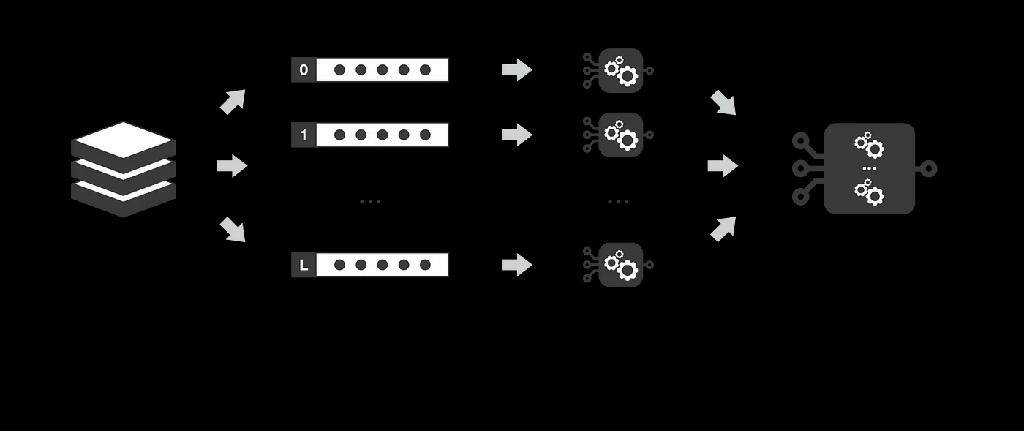

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

In [87]:
BC = BaggingClassifier()
BC.fit(X_train_clf, y_test_clf)
y_pred_BC = BC.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_BC))

ValueError: Found input variables with inconsistent numbers of samples: [48480, 12121]

In [ ]:
print('Confusion matrix\n\n', confusion_matrix(y_test_clf, y_pred_BC))

In [ ]:
BR = BaggingRegressor()
BR.fit(X_train_reg, y_train_reg)
y_pred_BR = BR.predict(X_test_reg)

print("MAE:", mean_absolute_error(y_test_reg, y_pred_BR))
print("MSE:", mean_squared_error(y_test_reg, y_pred_BR))
print("R^2:", r2_score(y_test_reg, y_pred_BR))

## Boosting

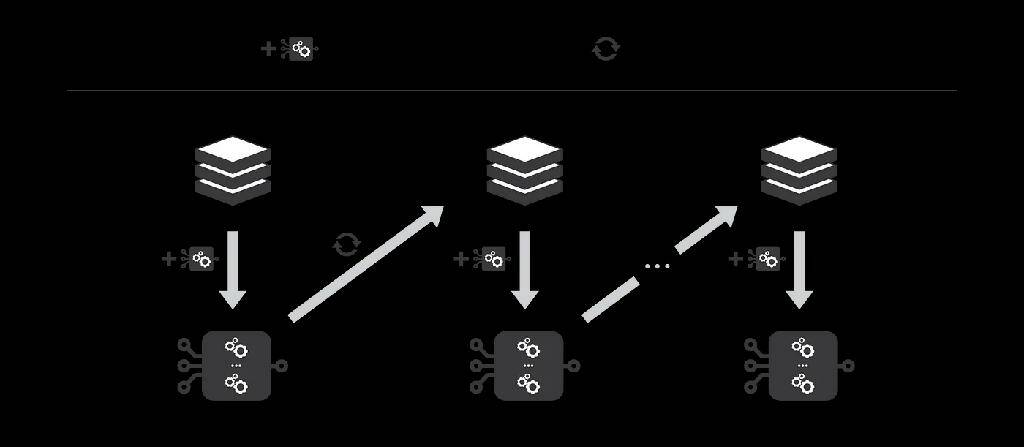

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

## Stacking

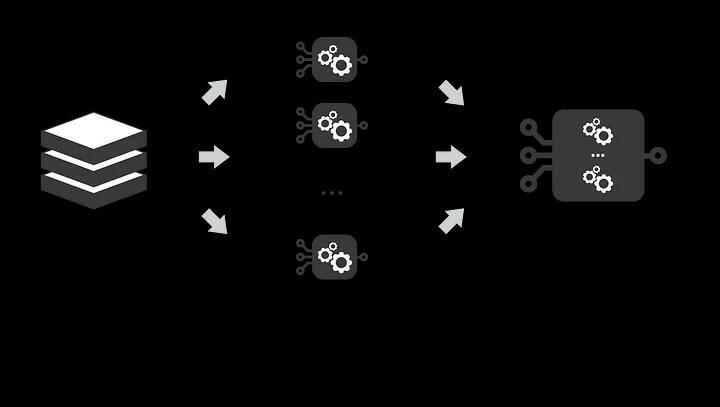

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor

# Задание 3. Catboost, XGBoost, LightGBM